In [ ]:
! git clone https://github.com/kkellygu/ds3001Project

Cloning into 'ds3001Project'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 18 (delta 5), reused 4 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 244.85 KiB | 4.29 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Read in  csv file
df = pd.read_csv('/content/ds3001Project/mental-heath-in-tech-2016_20161114.csv')

# Display dataframe information
print("Database information:")
print("\nDatabase shape: ", df.shape)
df.head()

Database information:

Database shape:  (1433, 63)


,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


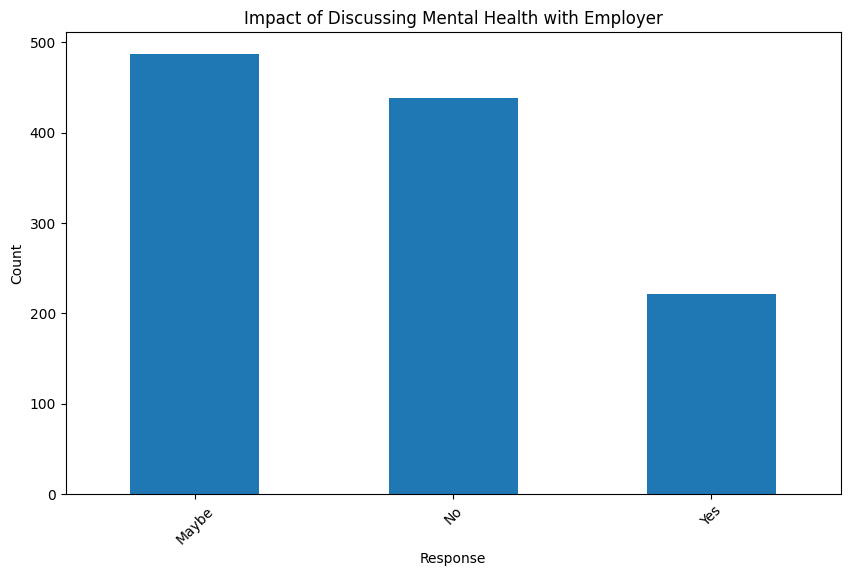

In [ ]:
question_col = 'Do you think that discussing a mental health disorder with your employer would have negative consequences?'
response_counts = df[question_col].value_counts()

plt.figure(figsize=(10, 6))
response_counts.plot(kind='bar')
plt.title('Impact of Discussing Mental Health with Employer')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

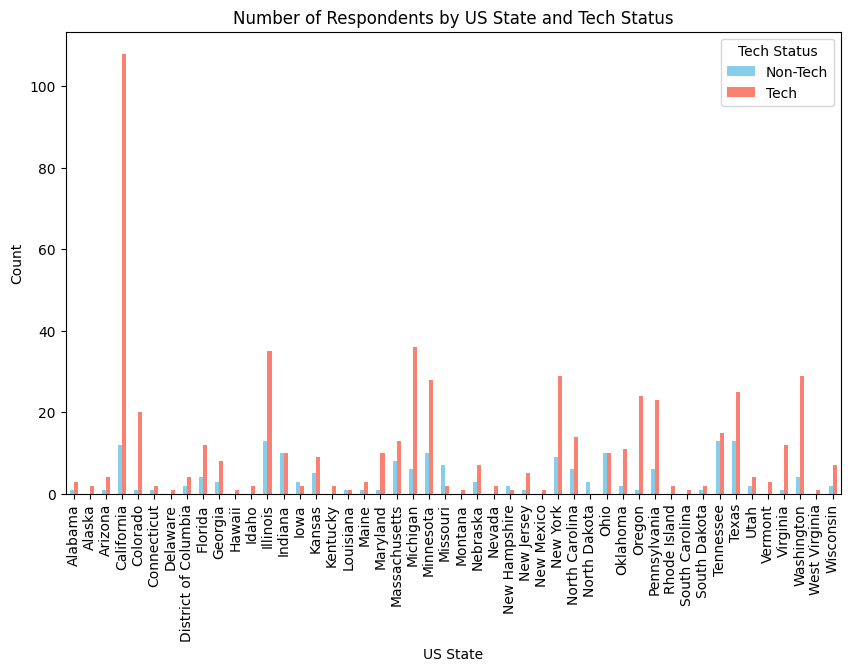

In [ ]:
# graphing number of respondents by state and tech
state_col = 'What US state or territory do you work in?'
tech_col = 'Is your employer primarily a tech company/organization?'

response_counts = df.groupby([state_col, tech_col]).size().unstack(fill_value=0)

ax = response_counts.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], figsize=(10, 6))

plt.title('Number of Respondents by US State and Tech Status')
plt.xlabel('US State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Tech Status', labels=['Non-Tech', 'Tech'])
plt.show()

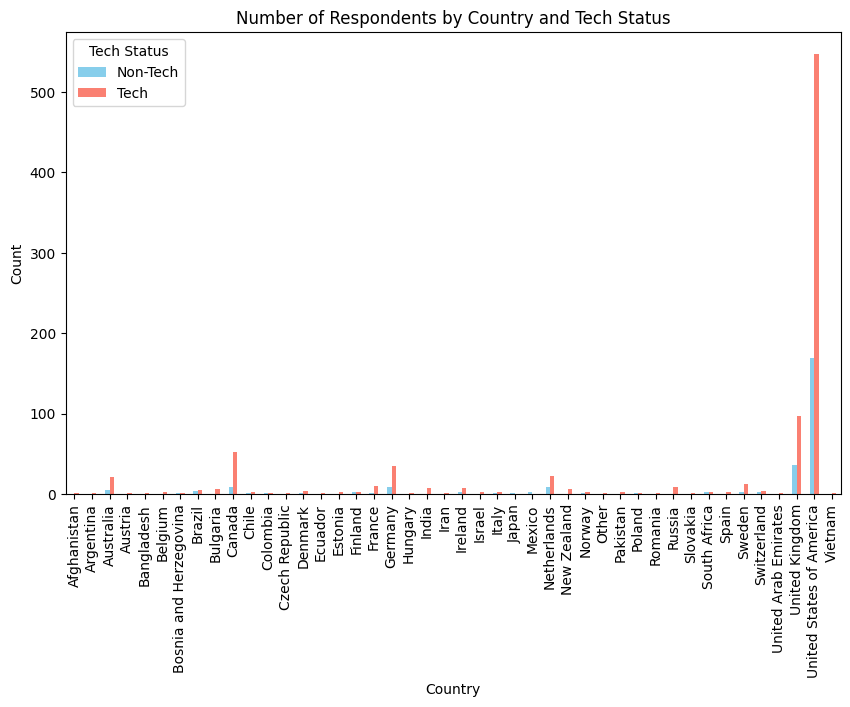

In [ ]:
# graphing number of respondents by country and tech
country_col = 'What country do you work in?'
tech_col = 'Is your employer primarily a tech company/organization?'

response_counts = df.groupby([country_col, tech_col]).size().unstack(fill_value=0)

ax = response_counts.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], figsize=(10, 6))

plt.title('Number of Respondents by Country and Tech Status')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Tech Status', labels=['Non-Tech', 'Tech'])
plt.show()

Removing completely empty columns: ['Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?']


/Users/carliestewart/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Performance:
[[42  9 20]
 [ 7 56 18]
 [20 16 42]]
              precision    recall  f1-score   support

           0       0.61      0.59      0.60        71
           1       0.69      0.69      0.69        81
           2       0.53      0.54      0.53        78

    accuracy                           0.61       230
   macro avg       0.61      0.61      0.61       230
weighted avg       0.61      0.61      0.61       230

Decision Tree Performance:
[[33  8 30]
 [ 3 59 19]
 [12 25 41]]
              precision    recall  f1-score   support

           0       0.69      0.46      0.55        71
           1       0.64      0.73      0.68        81
           2       0.46      0.53      0.49        78

    accuracy                           0.58       230
   macro avg       0.59      0.57      0.57       230
weighted avg       0.59      0.58      0.58       230



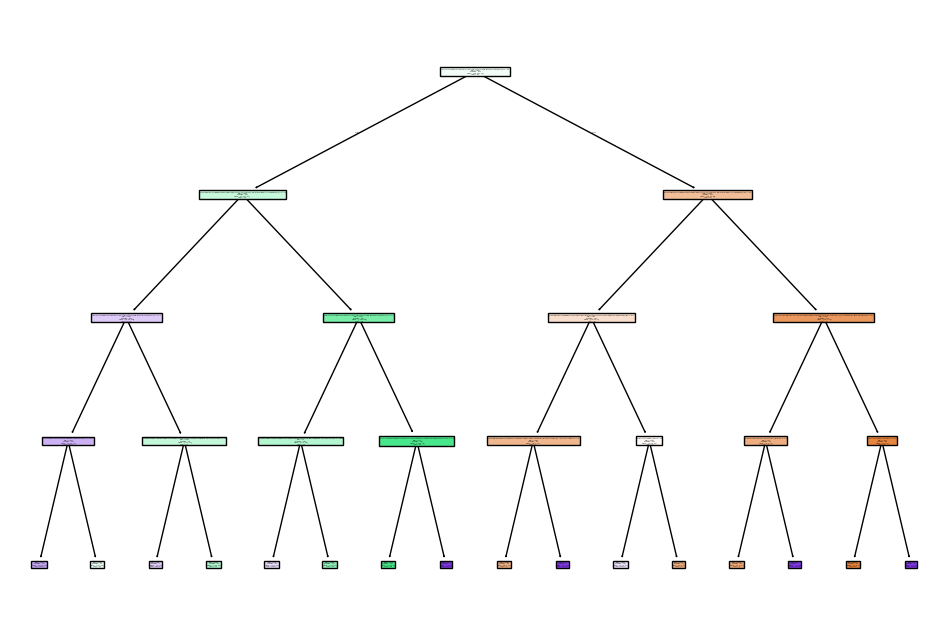

In [25]:
# Supervised Learning Setup

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

file_path = 'mental-heath-in-tech-2016_20161114.csv'
data = pd.read_csv(file_path)
data.columns = data.columns.str.strip()

# Step 2: Data Preprocessing
target = 'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'

# Handle Missing Values
data = data.dropna(subset=[target])

# Encode Target Variable
data[target] = data[target].map(
    {'Yes': 1, 'No': 0, 'Maybe': 2}
)

# Convert ordinal columns to numeric values
ordinal_mappings = {
    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:': {
        'Very easy': 5,
        'Somewhat easy': 4,
        'Neither easy nor difficult': 3,
        'Somewhat difficult': 2,
        'Very difficult': 1
    }
}

for column, mapping in ordinal_mappings.items():
    if column in data.columns:
        data[column] = data[column].map(mapping)

# Convert string ranges in employee size column to numeric values
if 'How many employees does your company or organization have?' in data.columns:
    data['How many employees does your company or organization have?'] = (
        data['How many employees does your company or organization have?']
        .replace({
            '6-25': 15,
            '26-100': 63,
            '100-500': 300,
            '500+': 1000,
            '<6': 3,
            'More than 1000': 1500
        })
    )

    # Convert strings to numeric and handle any remaining invalid entries
    data['How many employees does your company or organization have?'] = pd.to_numeric(
        data['How many employees does your company or organization have?'], errors='coerce'
    )

# One-Hot Encode All Remaining Categorical Columns
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# check for completely empty columns
empty_columns = [col for col in data.columns if data[col].isnull().all()]
if empty_columns:
    print(f"Removing completely empty columns: {empty_columns}")
    data = data.drop(columns=empty_columns)

# separate Features and Target
features = data.drop(columns=[target])
target_data = data[target]

# handle missing values in features (Impute)
imputer = SimpleImputer(strategy='mean')  # Replace missing values with column mean
imputed_features = imputer.fit_transform(features)  # Perform imputation
features = pd.DataFrame(imputed_features, columns=features.columns)  # Reassign with proper alignment

# define features and target
X = features.values
y = target_data.values

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train logistic regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#  evaluate
print("Logistic Regression Performance:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# train decision tree
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)
y_tree_pred = tree_model.predict(X_test)

# Evalusate
print("Decision Tree Performance:")
print(confusion_matrix(y_test, y_tree_pred))
print(classification_report(y_test, y_tree_pred))

# Plot decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(tree_model, feature_names=features.columns, class_names=['No', 'Yes', 'Maybe'], filled=True)
plt.show()


In [2]:
! pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [6]:
# random forest performance 
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import pandas as pd

file_path = 'mental-heath-in-tech-2016_20161114.csv'
data = pd.read_csv(file_path)

# Define target variable and updated predictors
target = 'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'
predictors = [
    'Does your employer provide mental health benefits as part of healthcare coverage?',
    'Do you know  options for mental health care available under your employer-provided coverage?',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
    'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
    'Do you feel that your employer takes mental health as seriously as physical health?',
    'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?',
    'How many employees does your company or organization have?',
    'Do you work remotely?',
    'Do you have a family history of mental illness?',
    'Have you ever sought treatment for a mental health issue from a mental health professional?'
]

# Filter data for relevant columns
data = data[[target] + predictors]

# Handle missing values
data = data.dropna(subset=[target]) 
data[target] = data[target].map({'Yes': 1, 'No': 0, 'Maybe': 2})

# One-hot encode categorical predictors and handle missing values for numerical predictors
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Handle missing values in predictors
imputer = SimpleImputer(strategy='mean')
features = data.drop(columns=[target])
imputed_features = imputer.fit_transform(features)
features = pd.DataFrame(imputed_features, columns=features.columns)

# features and target
X = features.values
y = data[target].values

# Use SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# evaluate Random Forest
print("Random Forest Performance:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
[[44  6 29]
 [ 7 72 14]
 [20 32 33]]
              precision    recall  f1-score   support

           0       0.62      0.56      0.59        79
           1       0.65      0.77      0.71        93
           2       0.43      0.39      0.41        85

    accuracy                           0.58       257
   macro avg       0.57      0.57      0.57       257
weighted avg       0.57      0.58      0.57       257

